# Passive Droplet pair in an $\infty ~3D$ domain


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import matplotlib.cm as cm
import matplotlib.tri as tri

In [2]:
import os

os.system('rm *.png')

0

In [3]:
import glob

In [4]:
%config InlineBackend.figure_format ='retina'

plt.rcParams['figure.constrained_layout.use'] = True

In [5]:
# tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
#     "font.family": "serif",
#     # Use 10pt font in plots, to match 10pt font in document
#     "axes.labelsize": 10,
#     "font.size": 10,
#     # Make the legend/label fonts a little smaller
#     "legend.fontsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8
# }

# plt.rcParams.update(tex_fonts)

In [6]:
####################################################################################

In [7]:
file = open("AGM_box_length.out", "r")

AGM_box_length = int(file.read())

In [8]:
initial_separation = float(np.load('initial_separation.npy'))

initial_separation

200.0

### Read the droplet radii and time from CH simulations

In [9]:
CH_time = np.load('CH_droplet_times.npy')

CH_MeanRadius = np.load('CH_MeanRadius.npy')

Text(0, 0.5, '$\\left \\langle R \\right \\rangle$')

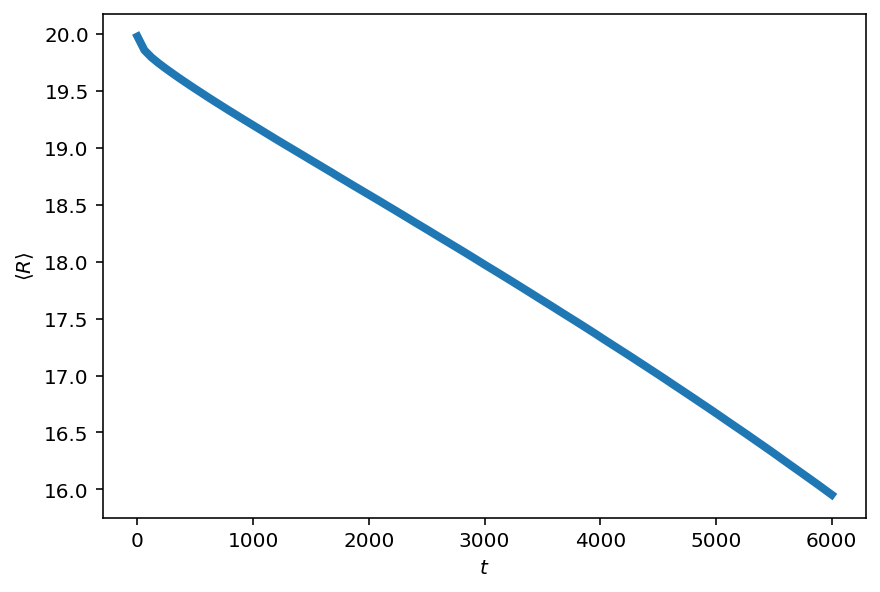

In [10]:
plt.plot(CH_time, CH_MeanRadius, linewidth = 4)

plt.xlabel(r'$t$')

plt.ylabel(r'$\left \langle R \right \rangle$')

In [11]:
###### Check if final Timestamp from AGM is same as from CH ######
    
global_AGM_time_list = []

global_AGM_time_list = sorted(glob.glob(r"./Data/Time_*.npy"))

counter = 0

for filename in global_AGM_time_list:

    start = filename.find('./Data/Time_')

    end = filename.find('.npy', start)

    AGM_time = np.load(filename)

    if (AGM_time[-1] > 1.1*CH_time[-1]):

        global_AGM_time_list = list(filter((filename).__ne__, global_AGM_time_list))

        print (filename)
        print (int(AGM_time[-1]))

        print()

        counter = counter + 1

In [12]:
counter, len(global_AGM_time_list)

(0, 348)

In [13]:
if (counter > 0):

    raise "Decrease the timestep of the AGM simulations"

##############################################################################

In [14]:
start = []

end = []

global_AGM_time = []

global_AGM_MeanRadius = []

#############

AGM_grid_discretization_list = []

shell_thickness_list = []

shell_sector_size_list = []

#############

deviation_array = []

#############

for filename in global_AGM_time_list:

    start = filename.find('Time_')

    end = filename.find('.npy', start)

    AGM_time = np.load(filename)
    
    ####################################################################################

    manufactured_filename_radius = './Data/MeanRadius_' + (filename[start+5:end]) + '.npy'

    AGM_MeanRadius = np.load(manufactured_filename_radius)
    
    ####################################################################################
    
    start = filename.find('X=')

    end = filename.find(',S=', start)

    AGM_grid_discretization = float(filename[start+2:end])

    ####################################################################################

    start = filename.find('S=')

    end = filename.find(',L=', start)

    shell_sector_size = float(filename[start+2:end])   

    ####################################################################################
    
    start = filename.find('L=')

    end = filename.find('.npy', start)

    shell_thickness = float(filename[start+2:end])

    ####################################################################################
    
    error = (AGM_MeanRadius[-1] - CH_MeanRadius[-1])/CH_MeanRadius[-1]
        
    deviation_array.append([error, 
                            AGM_grid_discretization, 
                            shell_sector_size, 
                            shell_thickness,
                            AGM_MeanRadius[-1]])
    
    ####################################################################################

    global_AGM_time.append(AGM_time)
    
    global_AGM_MeanRadius.append(AGM_MeanRadius)
    
    ####################################################################################
    
    AGM_grid_discretization_list.append(AGM_grid_discretization)
    
    shell_sector_size_list.append(shell_sector_size)
    
    shell_thickness_list.append(shell_thickness)
    
####################################################################################

global_AGM_time = np.asarray(global_AGM_time)

global_AGM_MeanRadius = np.asarray(global_AGM_MeanRadius)

AGM_grid_discretization_list = np.asarray(AGM_grid_discretization_list)

shell_sector_size_list = np.asarray(shell_sector_size_list)

shell_thickness_list = np.asarray(shell_thickness_list)

deviation_array = np.asarray(deviation_array)

/Users/ajinkyakulkarni/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


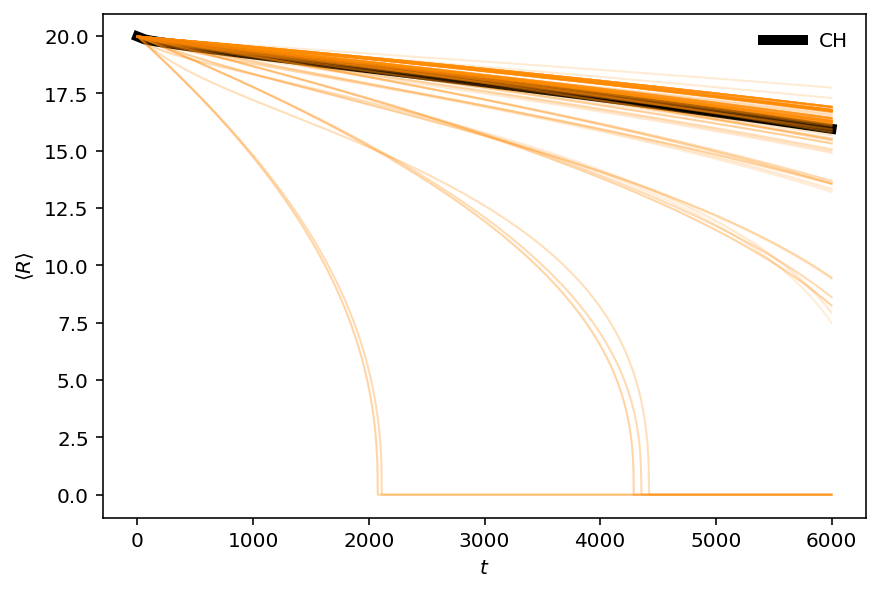

In [15]:
plt.plot(CH_time, CH_MeanRadius, 'k', linewidth = 5, label = 'CH')

alphas = np.linspace(0.05, 0.1, global_AGM_time.shape[0])

for i in range(global_AGM_time.shape[0]):
    
    plt.plot(global_AGM_time[i], global_AGM_MeanRadius[i], 'darkorange', 
             linewidth = 1, alpha = alphas[i])

plt.xlabel(r'$t$')

plt.ylabel(r'$\left \langle R \right \rangle$')

plt.legend(loc = 'best')

plt.legend(frameon = False)

# plt.savefig('All_Tracks.png', dpi = 200, bbox_inches = 'tight')

# plt.close()

### Deviation plots

In [16]:
max_error_positive = 0.1

max_error_negative = -0.1

levels_max = 17

In [17]:
np.unique(AGM_grid_discretization_list), np.unique(shell_sector_size_list), np.unique(shell_thickness_list)

(array([  5.,  10.,  20.,  40.,  80., 200., 400.]),
 array([ 5., 10., 20., 40., 70.]),
 array([  2.,   5.,  10.,  20.,  40.,  50.,  70., 160., 200., 400.]))

In [18]:
selected_discretization = 20

In [19]:
# Isolate only fixed grid discretization rows

new_deviation_array = deviation_array[(deviation_array[:, 1] == selected_discretization)]

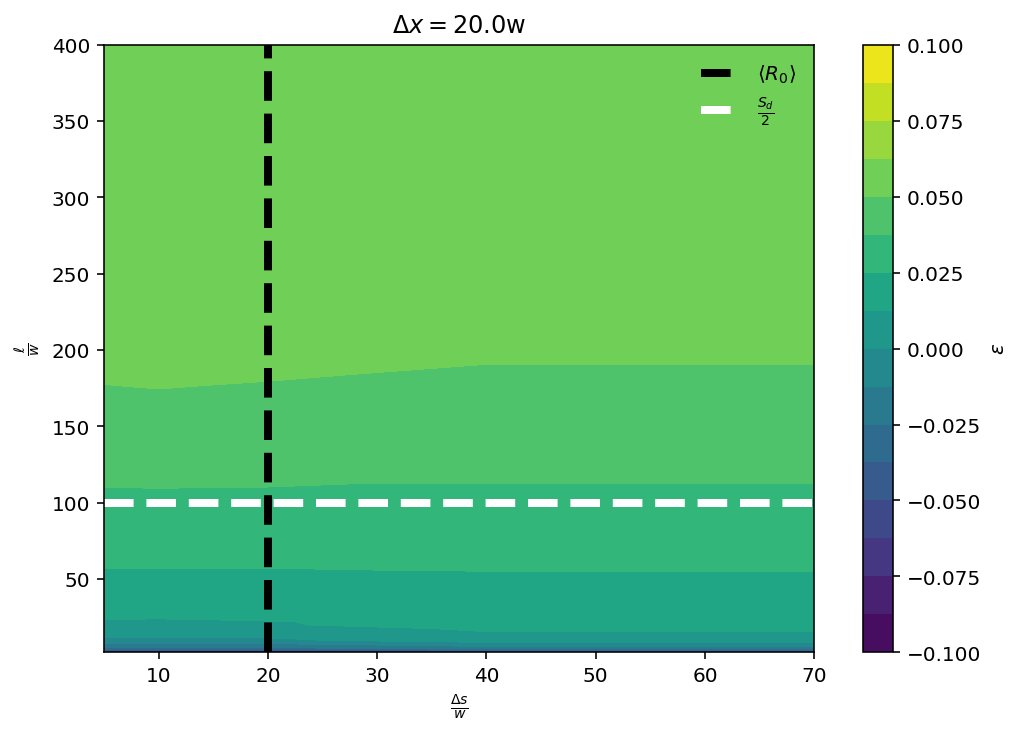

In [20]:
plt.figure(figsize=(7, 5))

####################################################################################

# plt.tricontourf(new_deviation_array[:, 2], new_deviation_array[:, 3], new_deviation_array[:, 0])

plt.tricontourf(new_deviation_array[:, 2], new_deviation_array[:, 3], new_deviation_array[:, 0],
               levels = np.linspace(max_error_negative, max_error_positive, levels_max))

# plt.yscale('log')
# plt.xscale('log')

cbar = plt.colorbar()

cbar.set_label(r'$\epsilon$')

plt.axvline(x = CH_MeanRadius[0], linewidth = 4, color = 'k', 
            linestyle = '--', label = r'$\left \langle R_0 \right \rangle$')

plt.axhline(y = initial_separation/2, linewidth = 4, color = 'w', 
            linestyle = '--', label = r'$\frac{S_d}{2}$')

plt.ylabel(r'$\frac{\ell}{w}$')

plt.xlabel(r'$\frac{\Delta s}{w}$')

plt.title(r'$\Delta x = $' + str(new_deviation_array[:, 1][0]) + 'w')

# plt.minorticks_on()
# plt.grid(b = True, which='both',linewidth=0.05)

plt.legend()

plt.legend(frameon = False)

filename = 'Errors_x_' + str(selected_discretization) + '.png'

# plt.savefig(filename, dpi = 300)

####################################################################################

In [21]:
np.unique(AGM_grid_discretization_list), np.unique(shell_sector_size_list), np.unique(shell_thickness_list)

(array([  5.,  10.,  20.,  40.,  80., 200., 400.]),
 array([ 5., 10., 20., 40., 70.]),
 array([  2.,   5.,  10.,  20.,  40.,  50.,  70., 160., 200., 400.]))

In [22]:
# deviation_array.append([error, 
#                             AGM_grid_discretization, 
#                             shell_sector_size, 
#                             shell_thickness,
#                             AGM_MeanRadius[-1]])

/var/folders/gc/3vhtrqjj04q3fmlrn6s_67q80000gn/T/ipykernel_5943/817403177.py:26: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


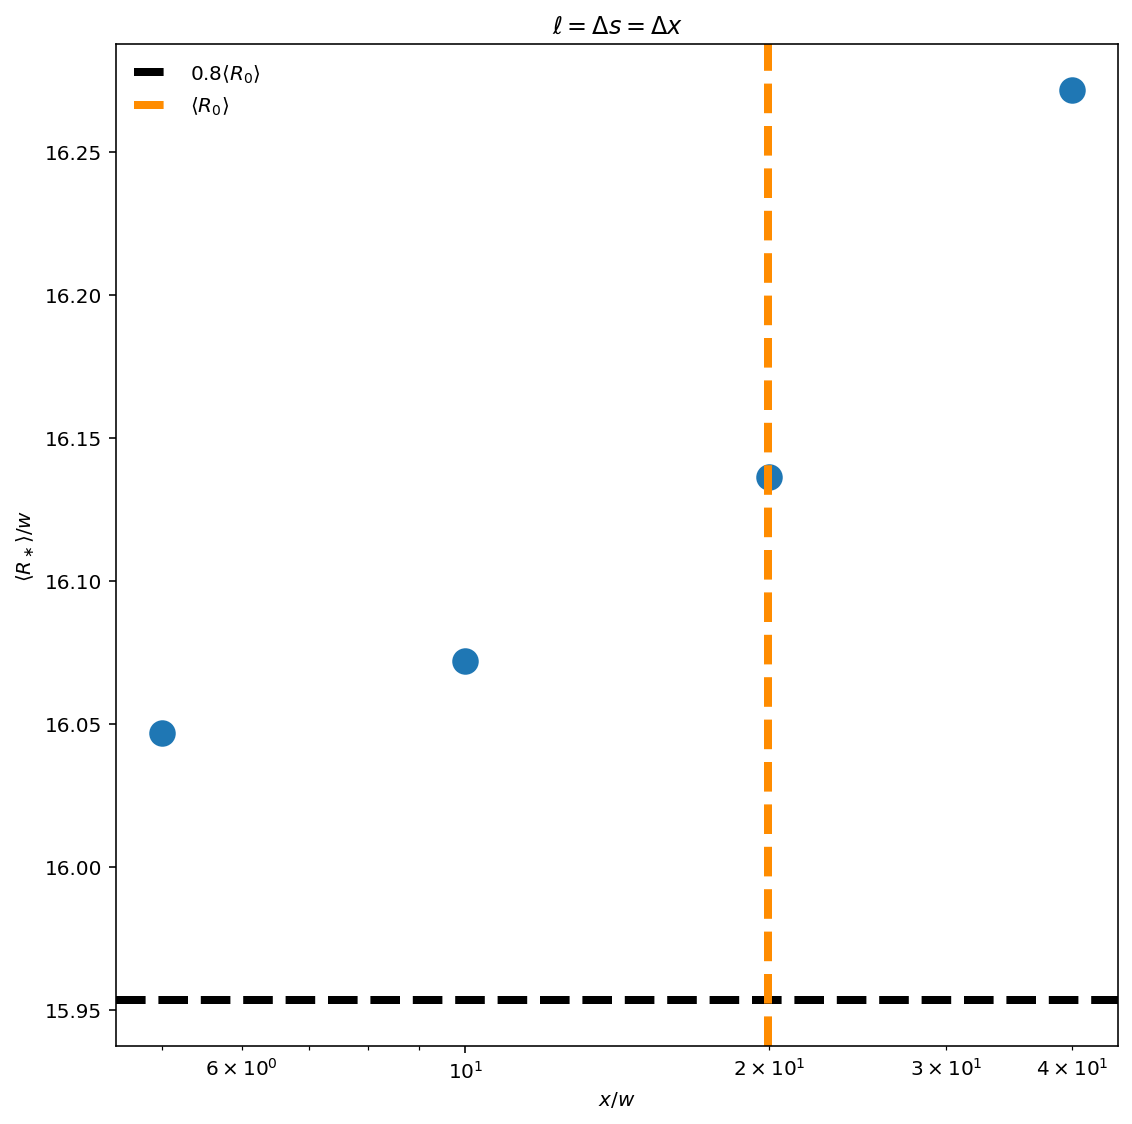

In [23]:
plt.figure(figsize=(8, 8))

deviation_array_deltaX = deviation_array[(deviation_array[:, 2] == deviation_array[:, 1]) & 
                                         (deviation_array[:, 3] == deviation_array[:, 1])]

plt.scatter(deviation_array_deltaX[:, 1], deviation_array_deltaX[:, 4], s = 150)
    
plt.xscale('log')

plt.axhline(y = CH_MeanRadius[-1], linewidth = 4, color = 'k', 
            linestyle = '--', label = r'$0.8 \left \langle R_0 \right \rangle$')

plt.axvline(x = CH_MeanRadius[0], linewidth = 4, color = 'darkorange', 
            linestyle = '--', label = r'$\left \langle R_0 \right \rangle$')

plt.legend()

plt.legend(frameon = False)

plt.title(r'$\ell = \Delta s = \Delta x$')

plt.xlabel(r'$x/w$')

plt.ylabel(r'$\left \langle R_\ast \right \rangle / w$')

plt.tight_layout()

# plt.savefig('Errors_1.png', dpi = 300)

In [24]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


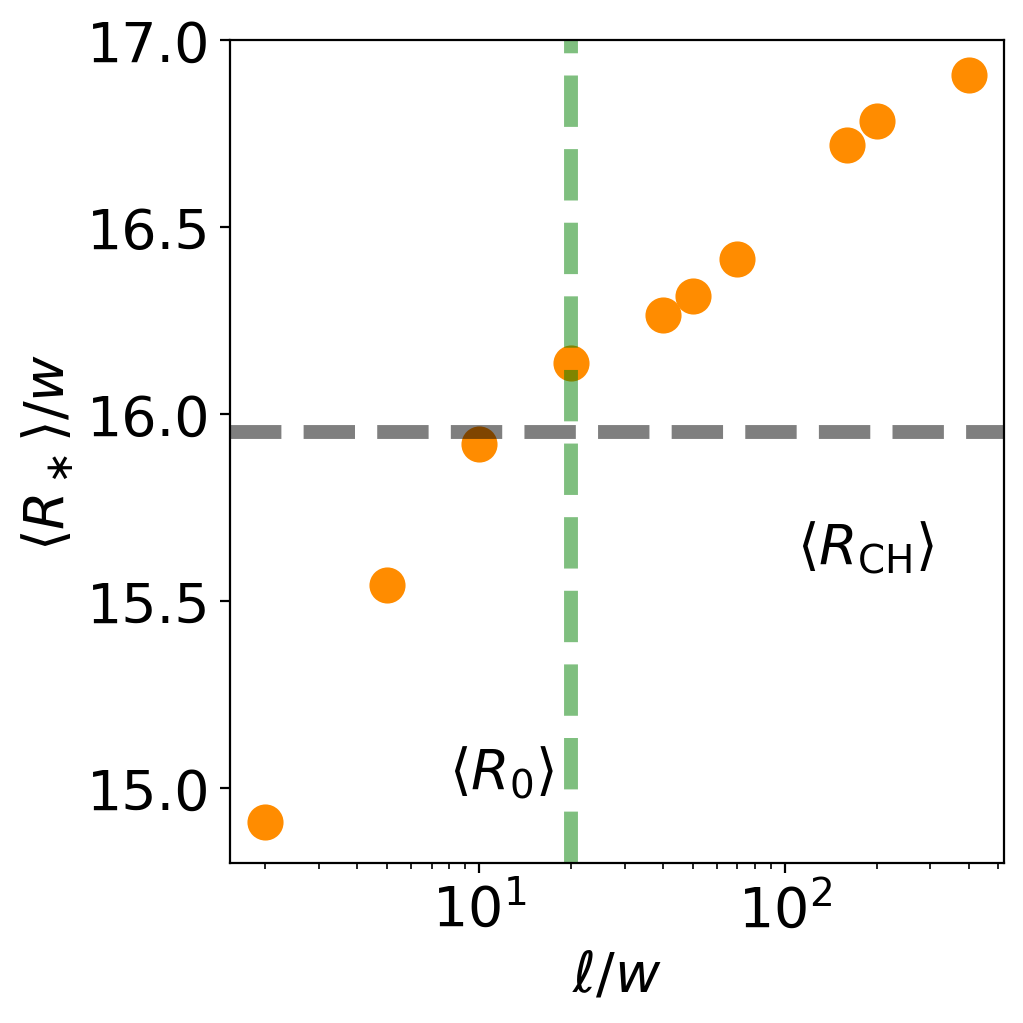

In [25]:
plt.style.use('default')

set_fontsize = 20

markersize = 12

plt.rcParams['figure.constrained_layout.use'] = True

plt.figure(figsize=(5, 5))

####################################################################################

deviation_array_L = deviation_array[(deviation_array[:, 1] == selected_discretization) & 
                                    (deviation_array[:, 2] == selected_discretization)]

plt.semilogx(deviation_array_L[:, 3], deviation_array_L[:, 4], 'o', 
             color = 'darkorange', markersize = markersize)

plt.axhline(y = CH_MeanRadius[-1], linewidth = 5, color = 'k', alpha = 0.5, 
            linestyle = '--', label = r'$0.8 \left \langle R_0 \right \rangle$')

plt.axvline(x = CH_MeanRadius[0], linewidth = 5, color = 'g', alpha = 0.5,
            linestyle = '--', label = r'$\left \langle R_0 \right \rangle$')

plt.text(110, 15.6, r'$\left \langle R_{\mathrm{CH}} \right \rangle$', color='k', fontsize = set_fontsize)

plt.text(8, 15, r'$\left \langle R_0 \right \rangle$', color='k', fontsize = set_fontsize)

plt.xlabel(r'$\ell / w$', fontsize=set_fontsize)

plt.ylabel(r'$\left \langle R_\ast \right \rangle / w$', fontsize=set_fontsize)

plt.ylim(14.8, 17)

plt.grid(False)

plt.tick_params(labelsize=set_fontsize)

####################################################################################

plt.savefig('Errors_L.pdf')

####################################################################################

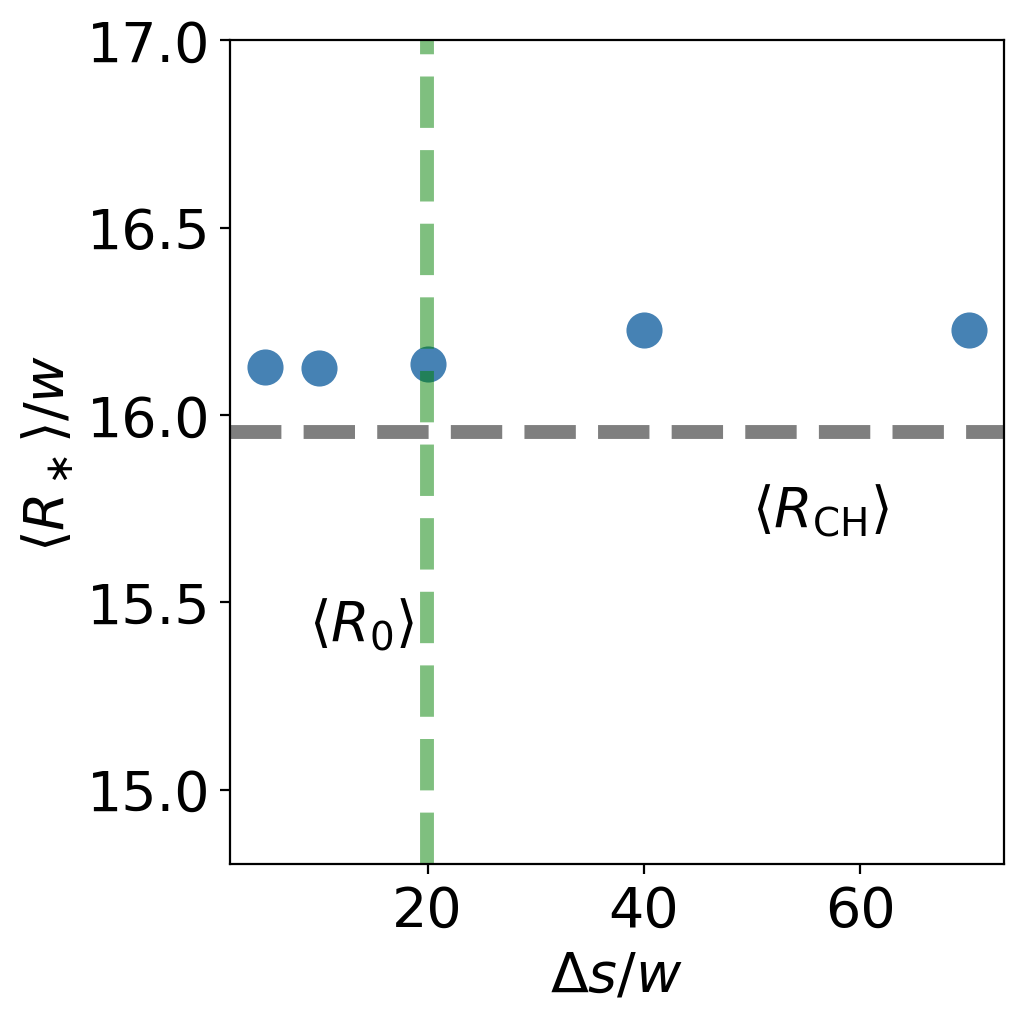

In [26]:
# plt.style.use('seaborn-whitegrid')

# set_fontsize = 25

# plt.rcParams['figure.constrained_layout.use'] = True

plt.figure(figsize=(5, 5))

deviation_array_deltaS = deviation_array[(deviation_array[:, 1] == selected_discretization) & 
                                         (deviation_array[:, 3] == selected_discretization)]

plt.plot(deviation_array_deltaS[:, 2], deviation_array_deltaS[:, 4], 'o', 
             color = 'steelblue', markersize = markersize)

plt.axhline(y = CH_MeanRadius[-1], linewidth = 5, color = 'k', alpha = 0.5, 
            linestyle = '--', label = r'$0.8 \left \langle R_0 \right \rangle$')

plt.axvline(x = CH_MeanRadius[0], linewidth = 5, color = 'g', alpha = 0.5,
            linestyle = '--', label = r'$\left \langle R_0 \right \rangle$')


plt.text(50, 15.7, r'$\left \langle R_{\mathrm{CH}} \right \rangle$', color='k', fontsize = set_fontsize)

plt.text(9, 15.4, r'$\left \langle R_0 \right \rangle$', color='k', fontsize = set_fontsize)

plt.xlabel(r'$\Delta s / w$', fontsize=set_fontsize)

plt.ylabel(r'$\left \langle R_\ast \right \rangle / w$', fontsize=set_fontsize)

plt.ylim(14.8, 17)

plt.grid(False)

plt.tick_params(labelsize=set_fontsize)

plt.savefig('Errors_S.pdf')